<a href="https://colab.research.google.com/github/ShawnSchmucker/MAE-494-Fall-2022/blob/main/MAE_494_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

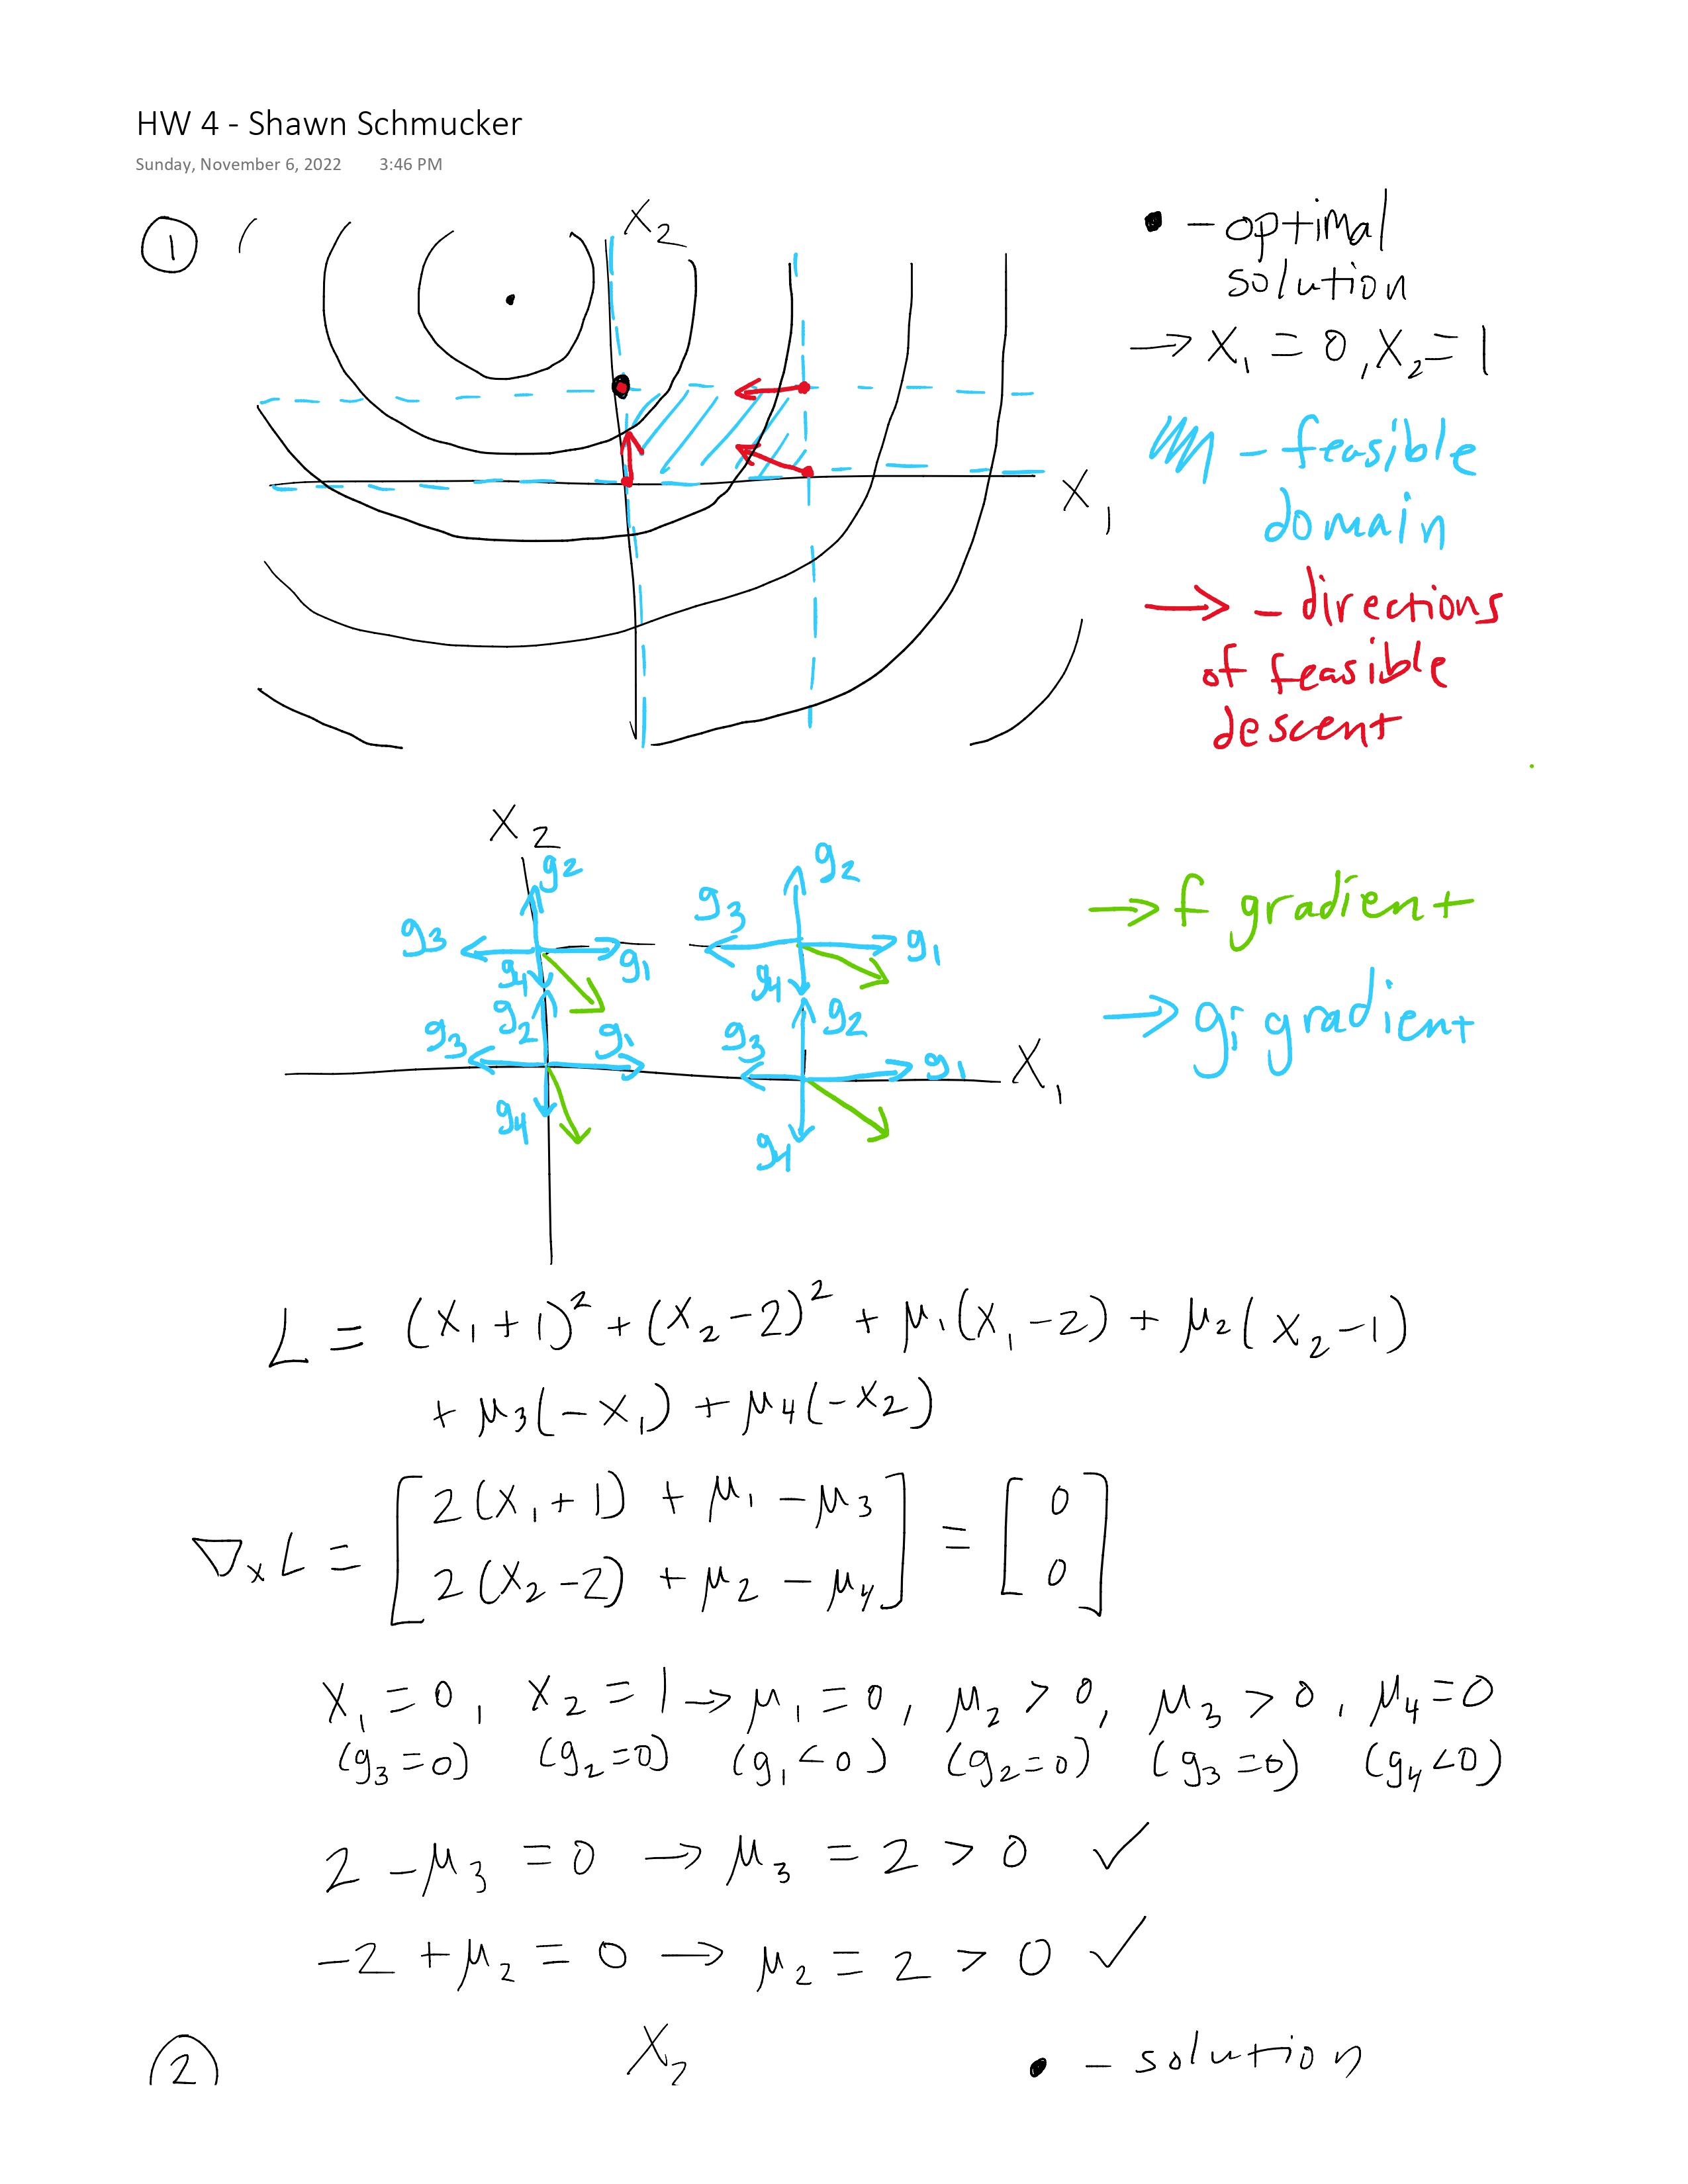

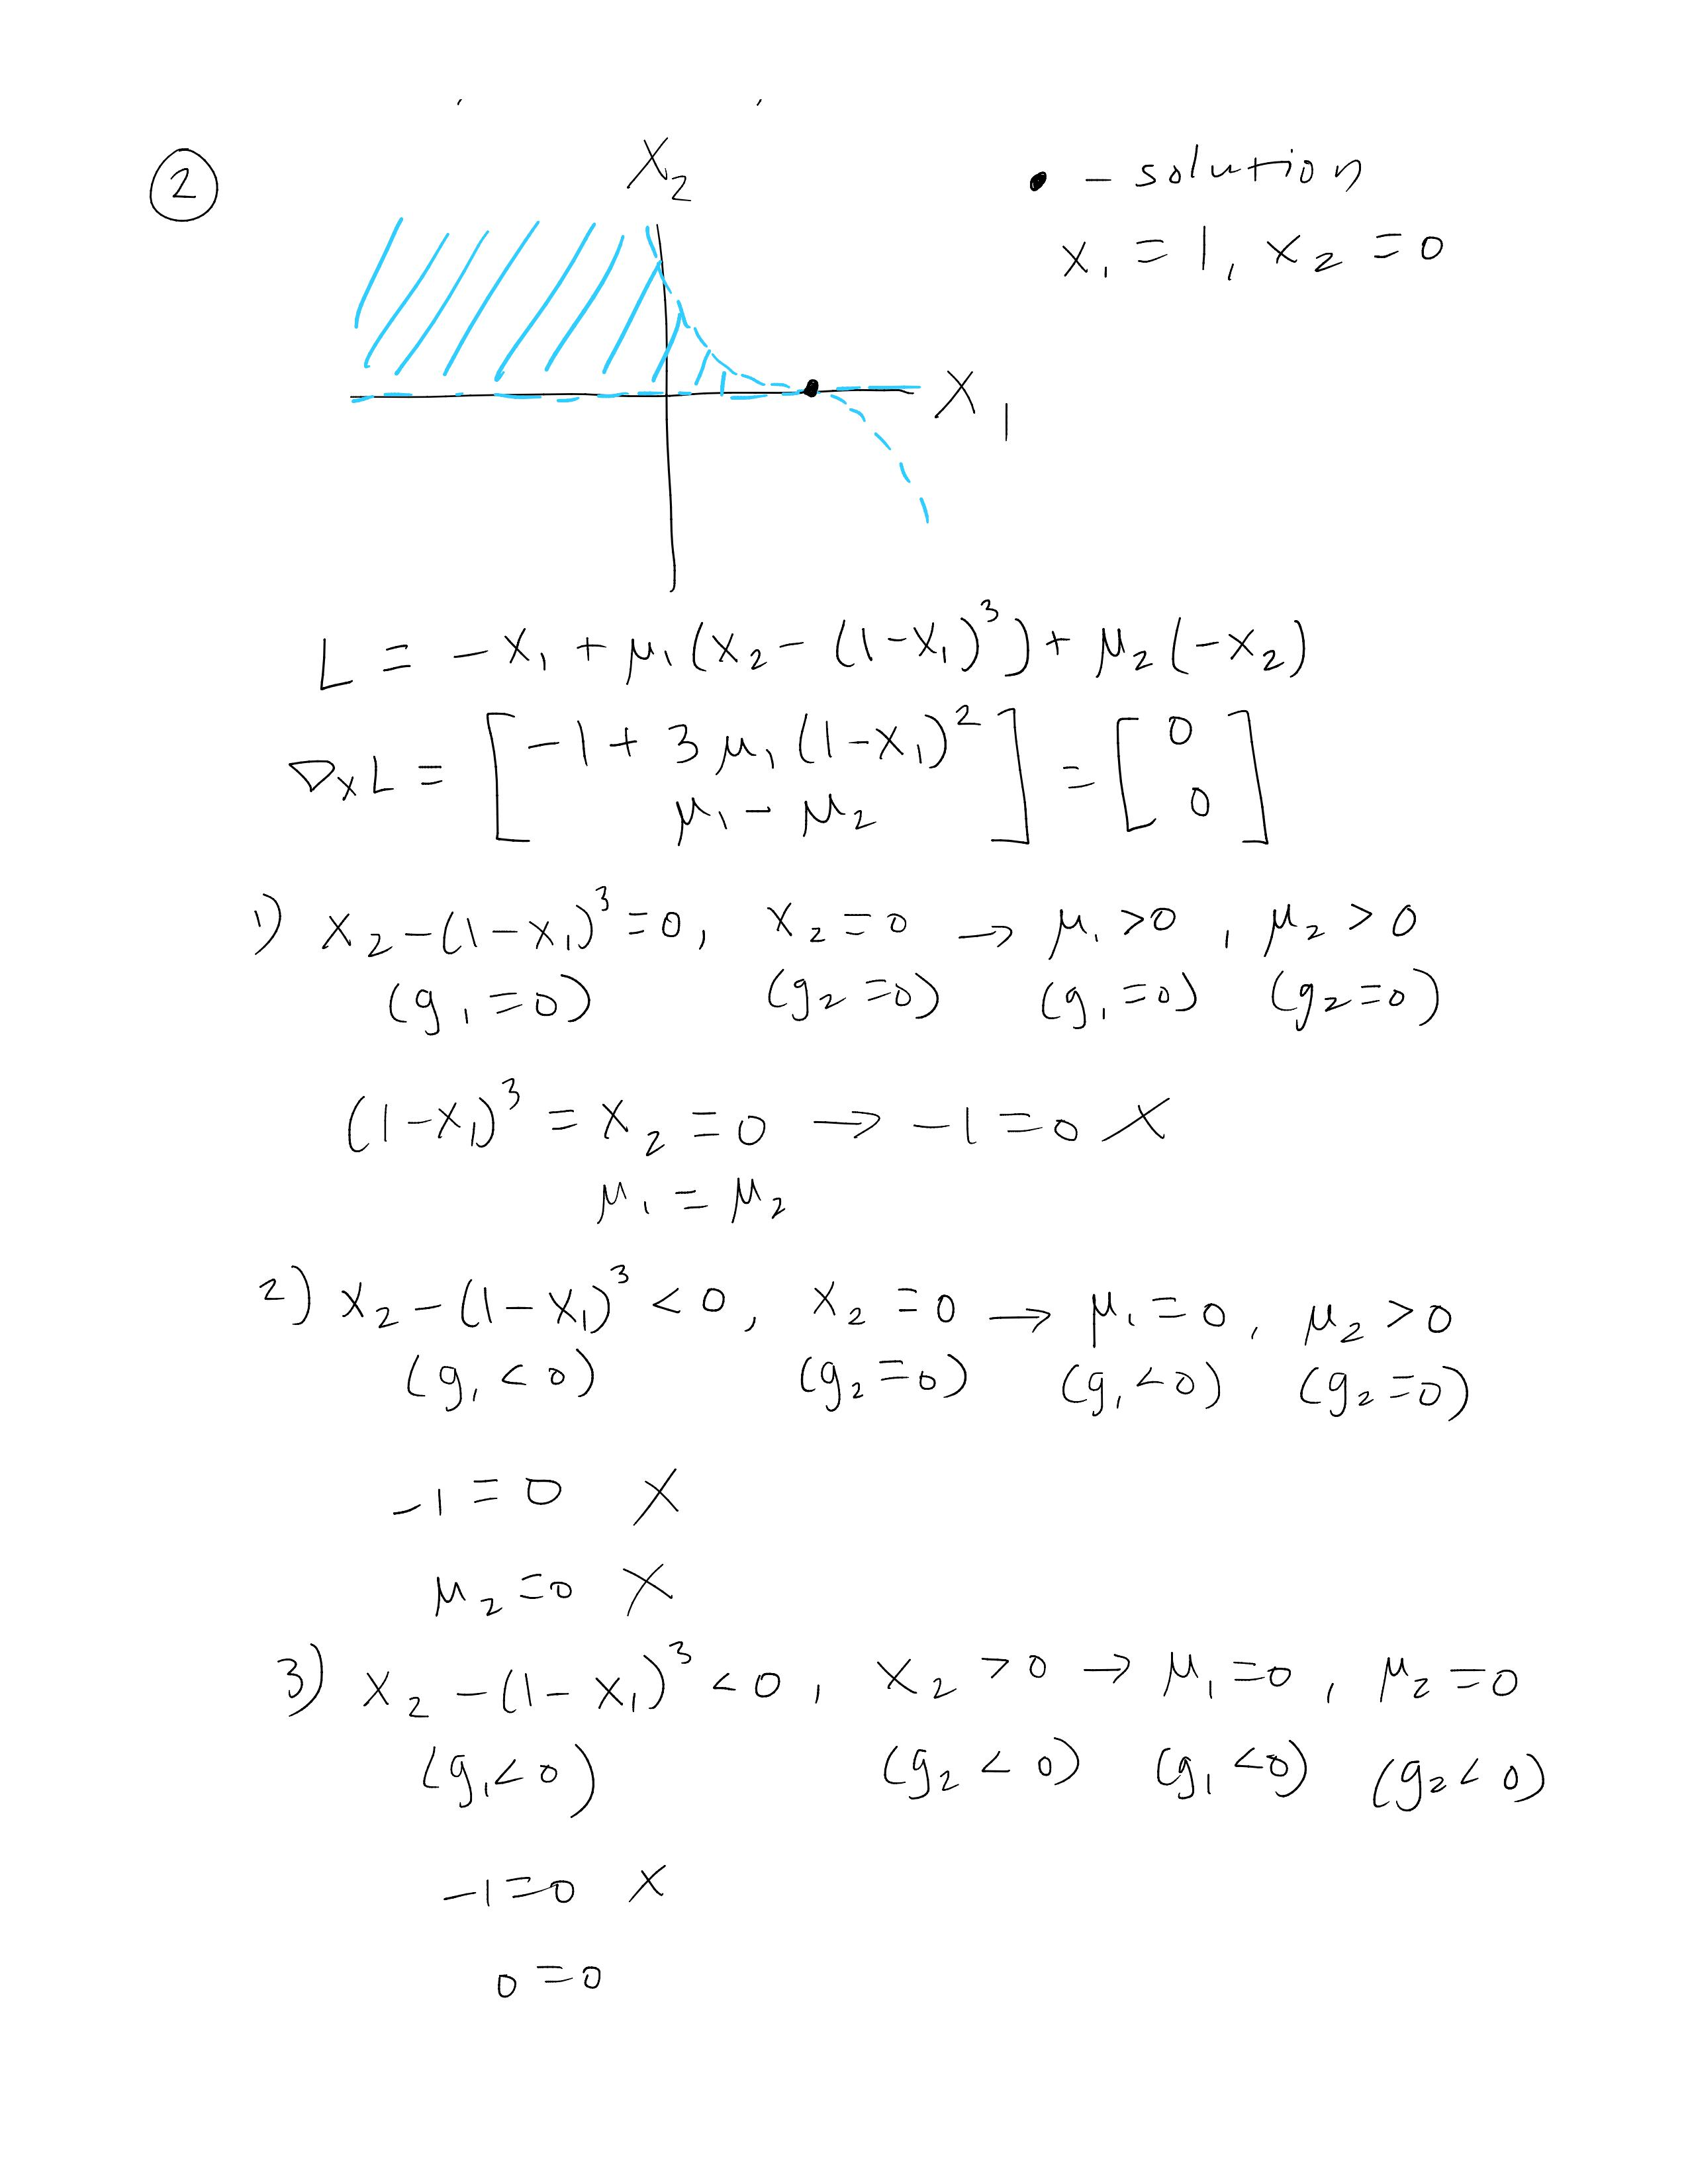

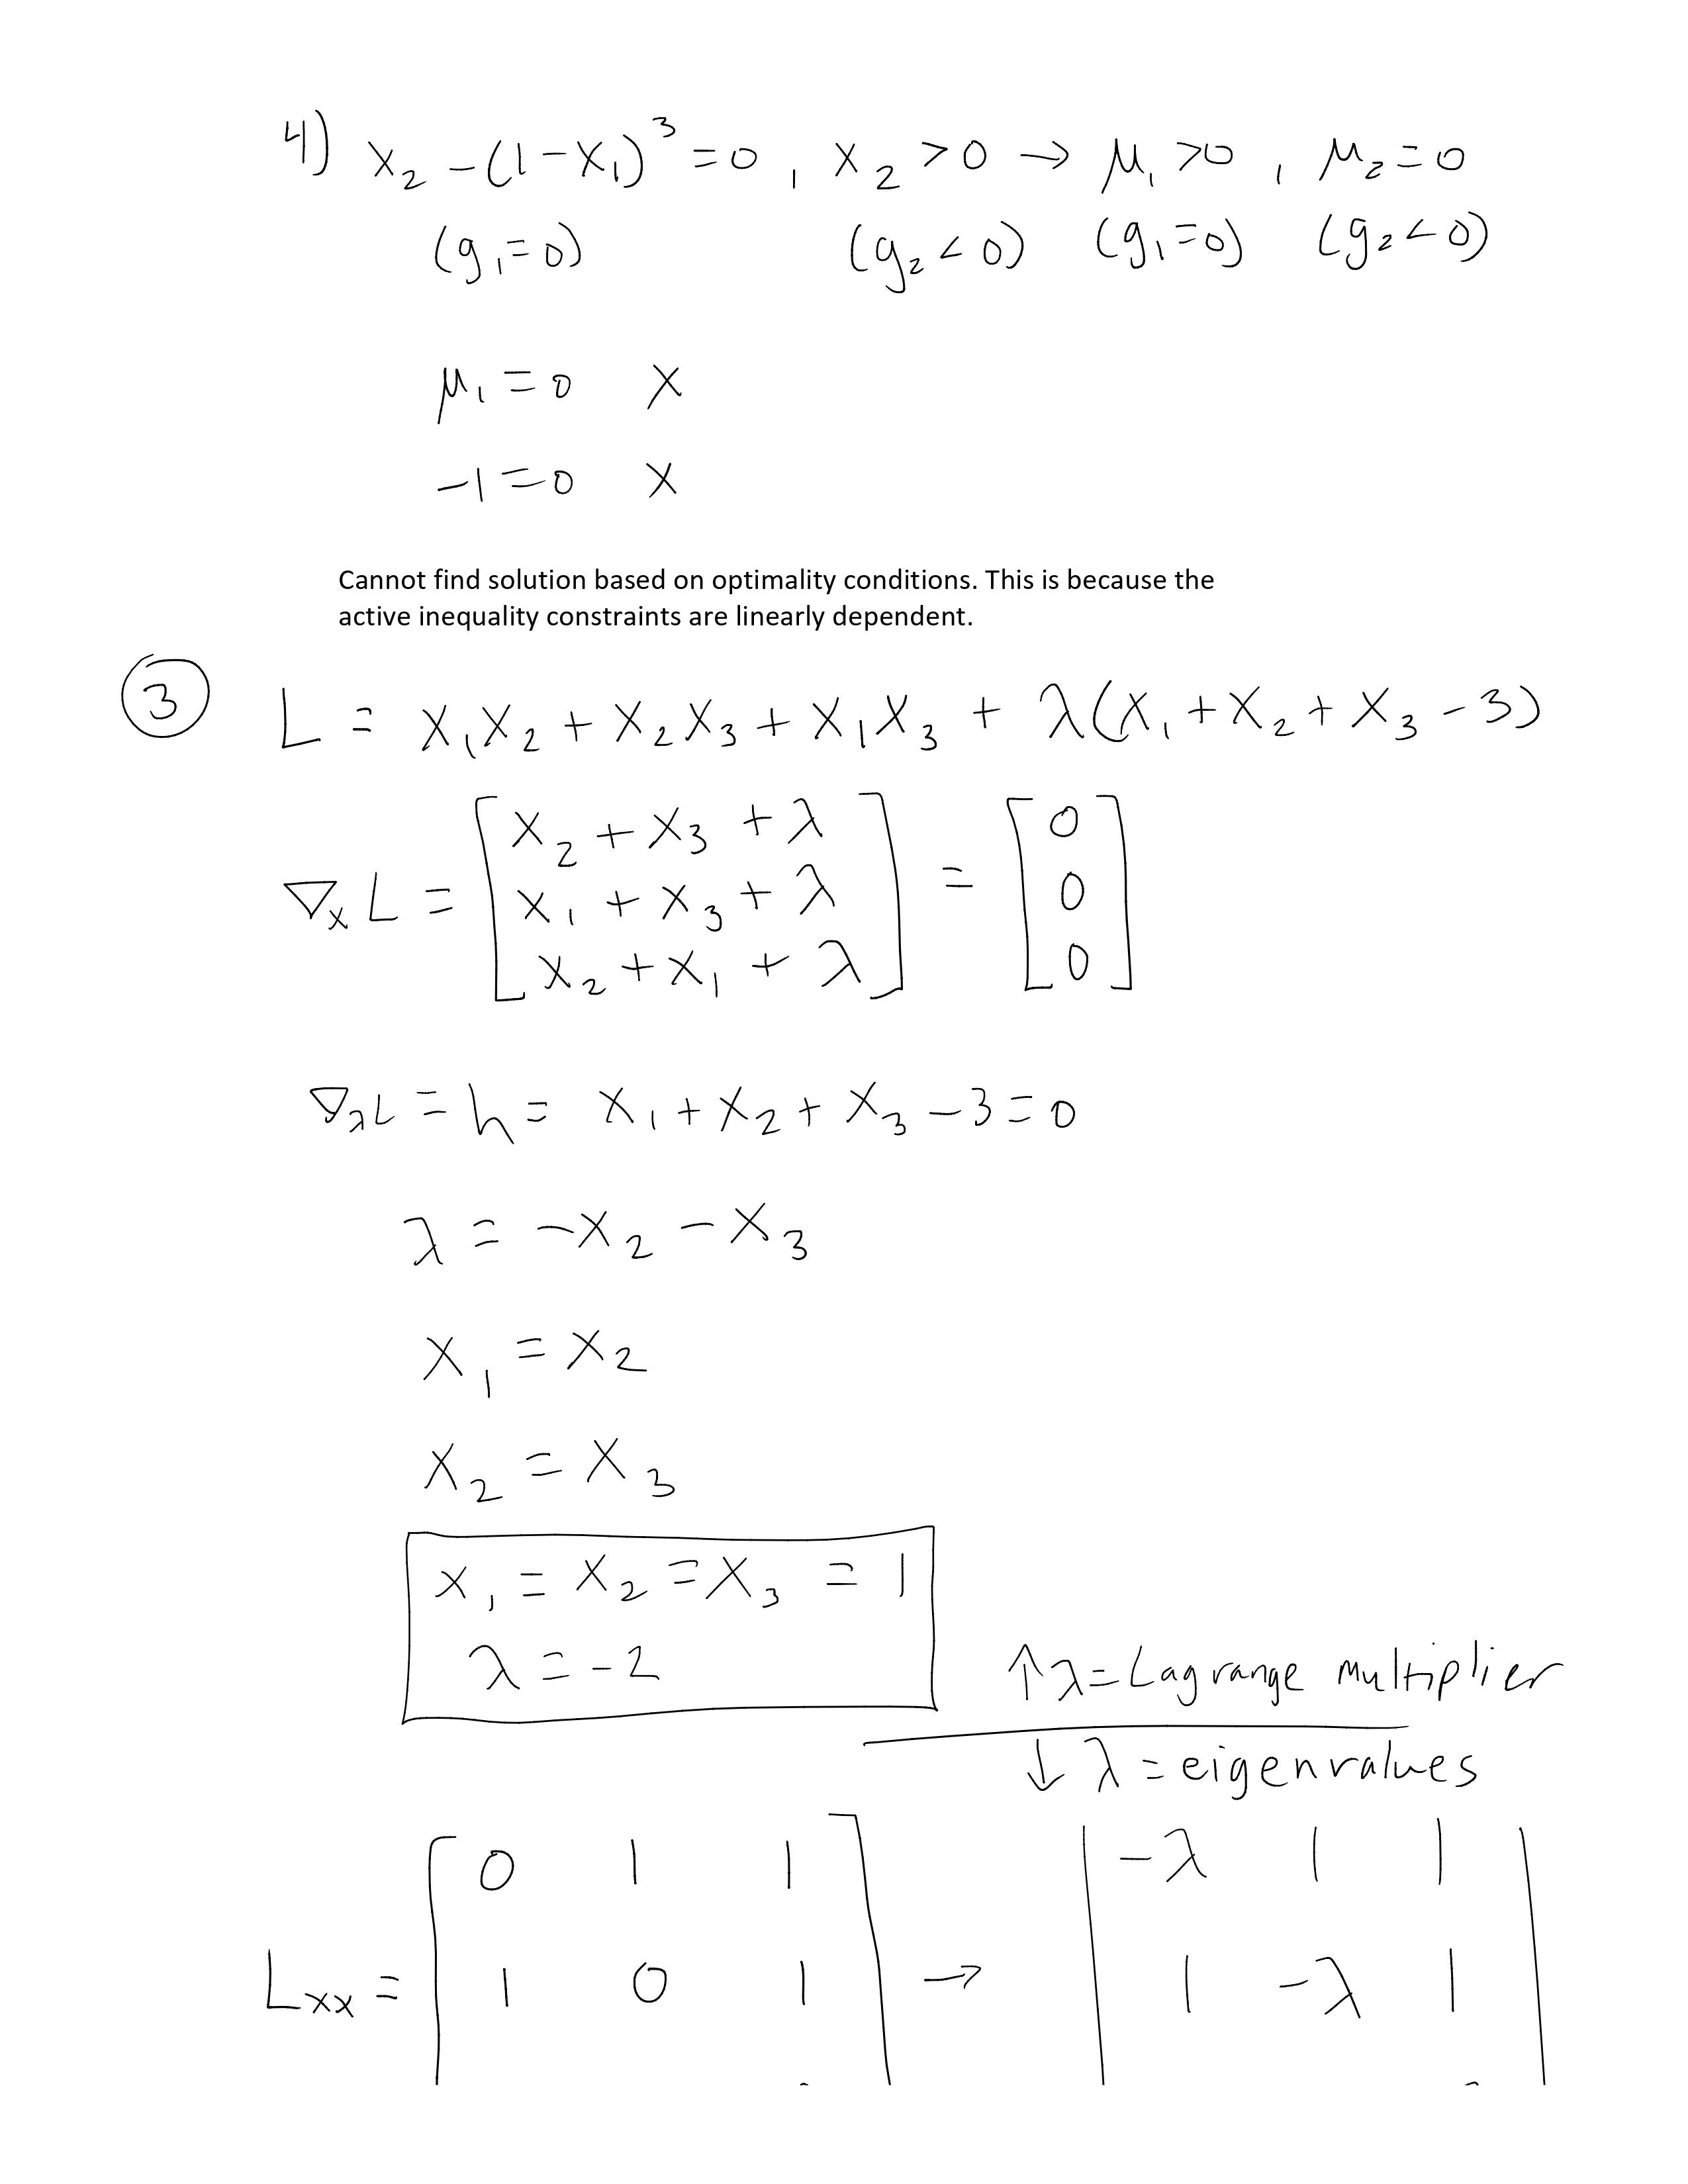

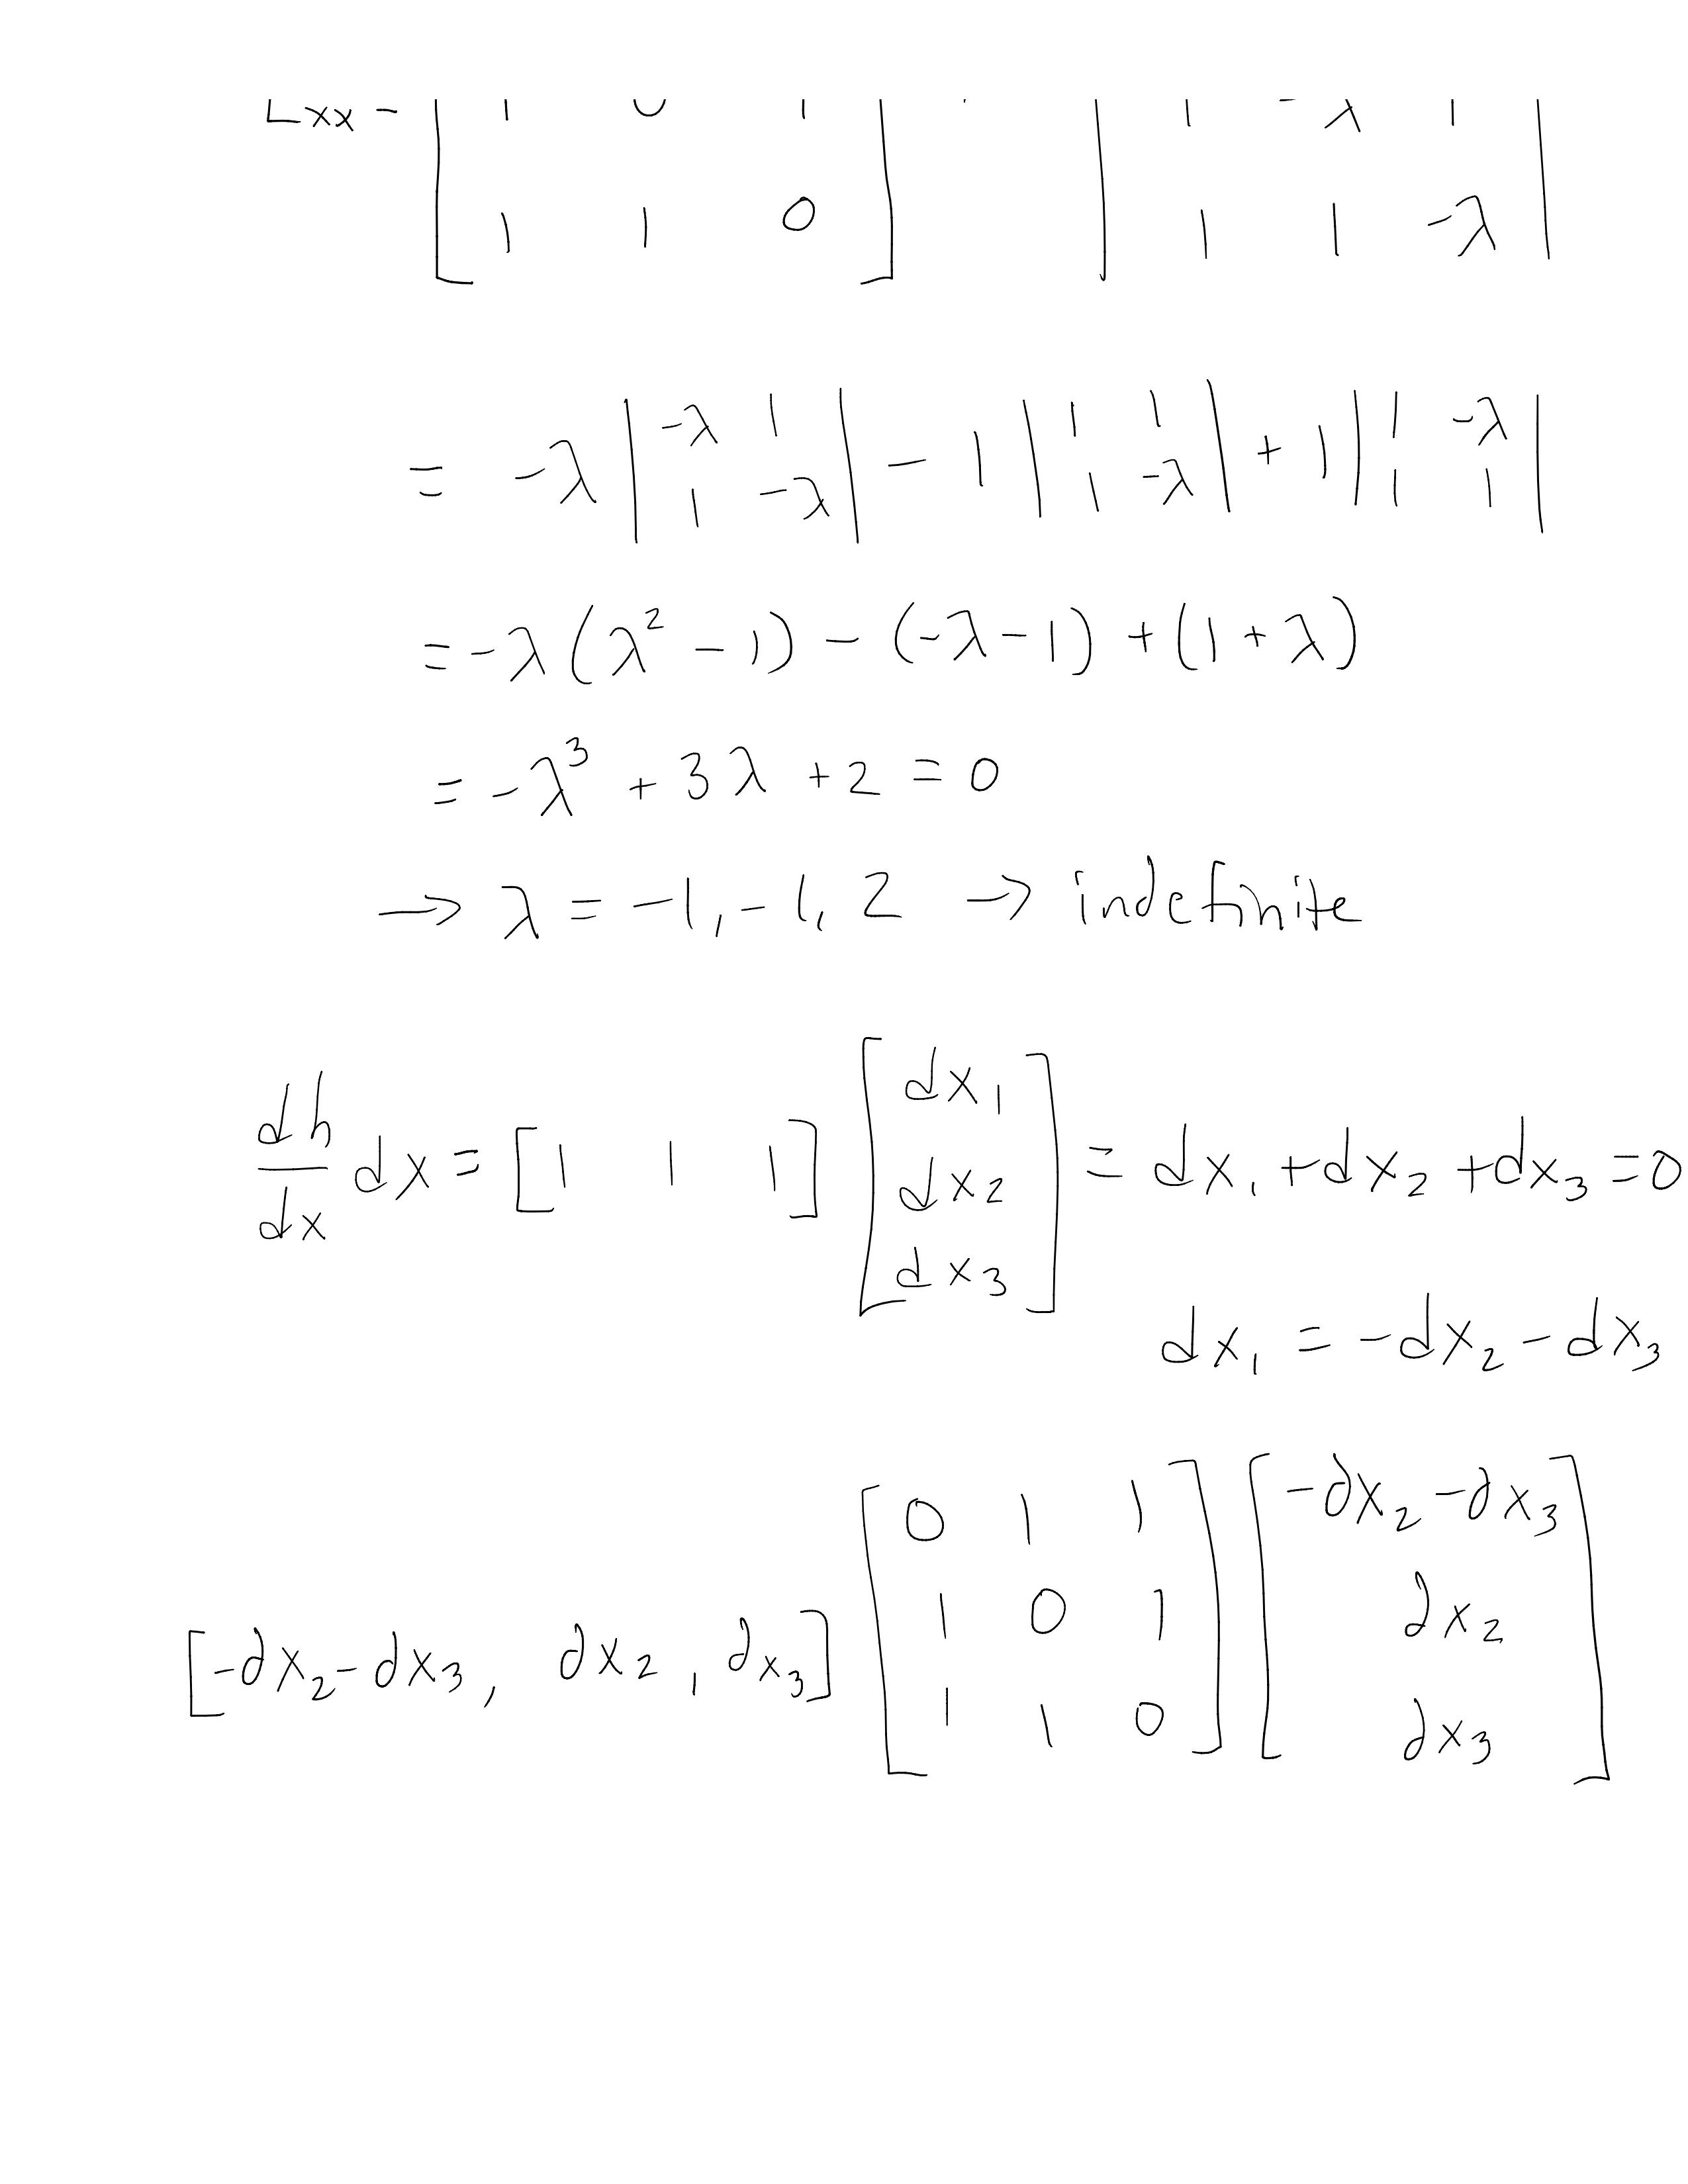

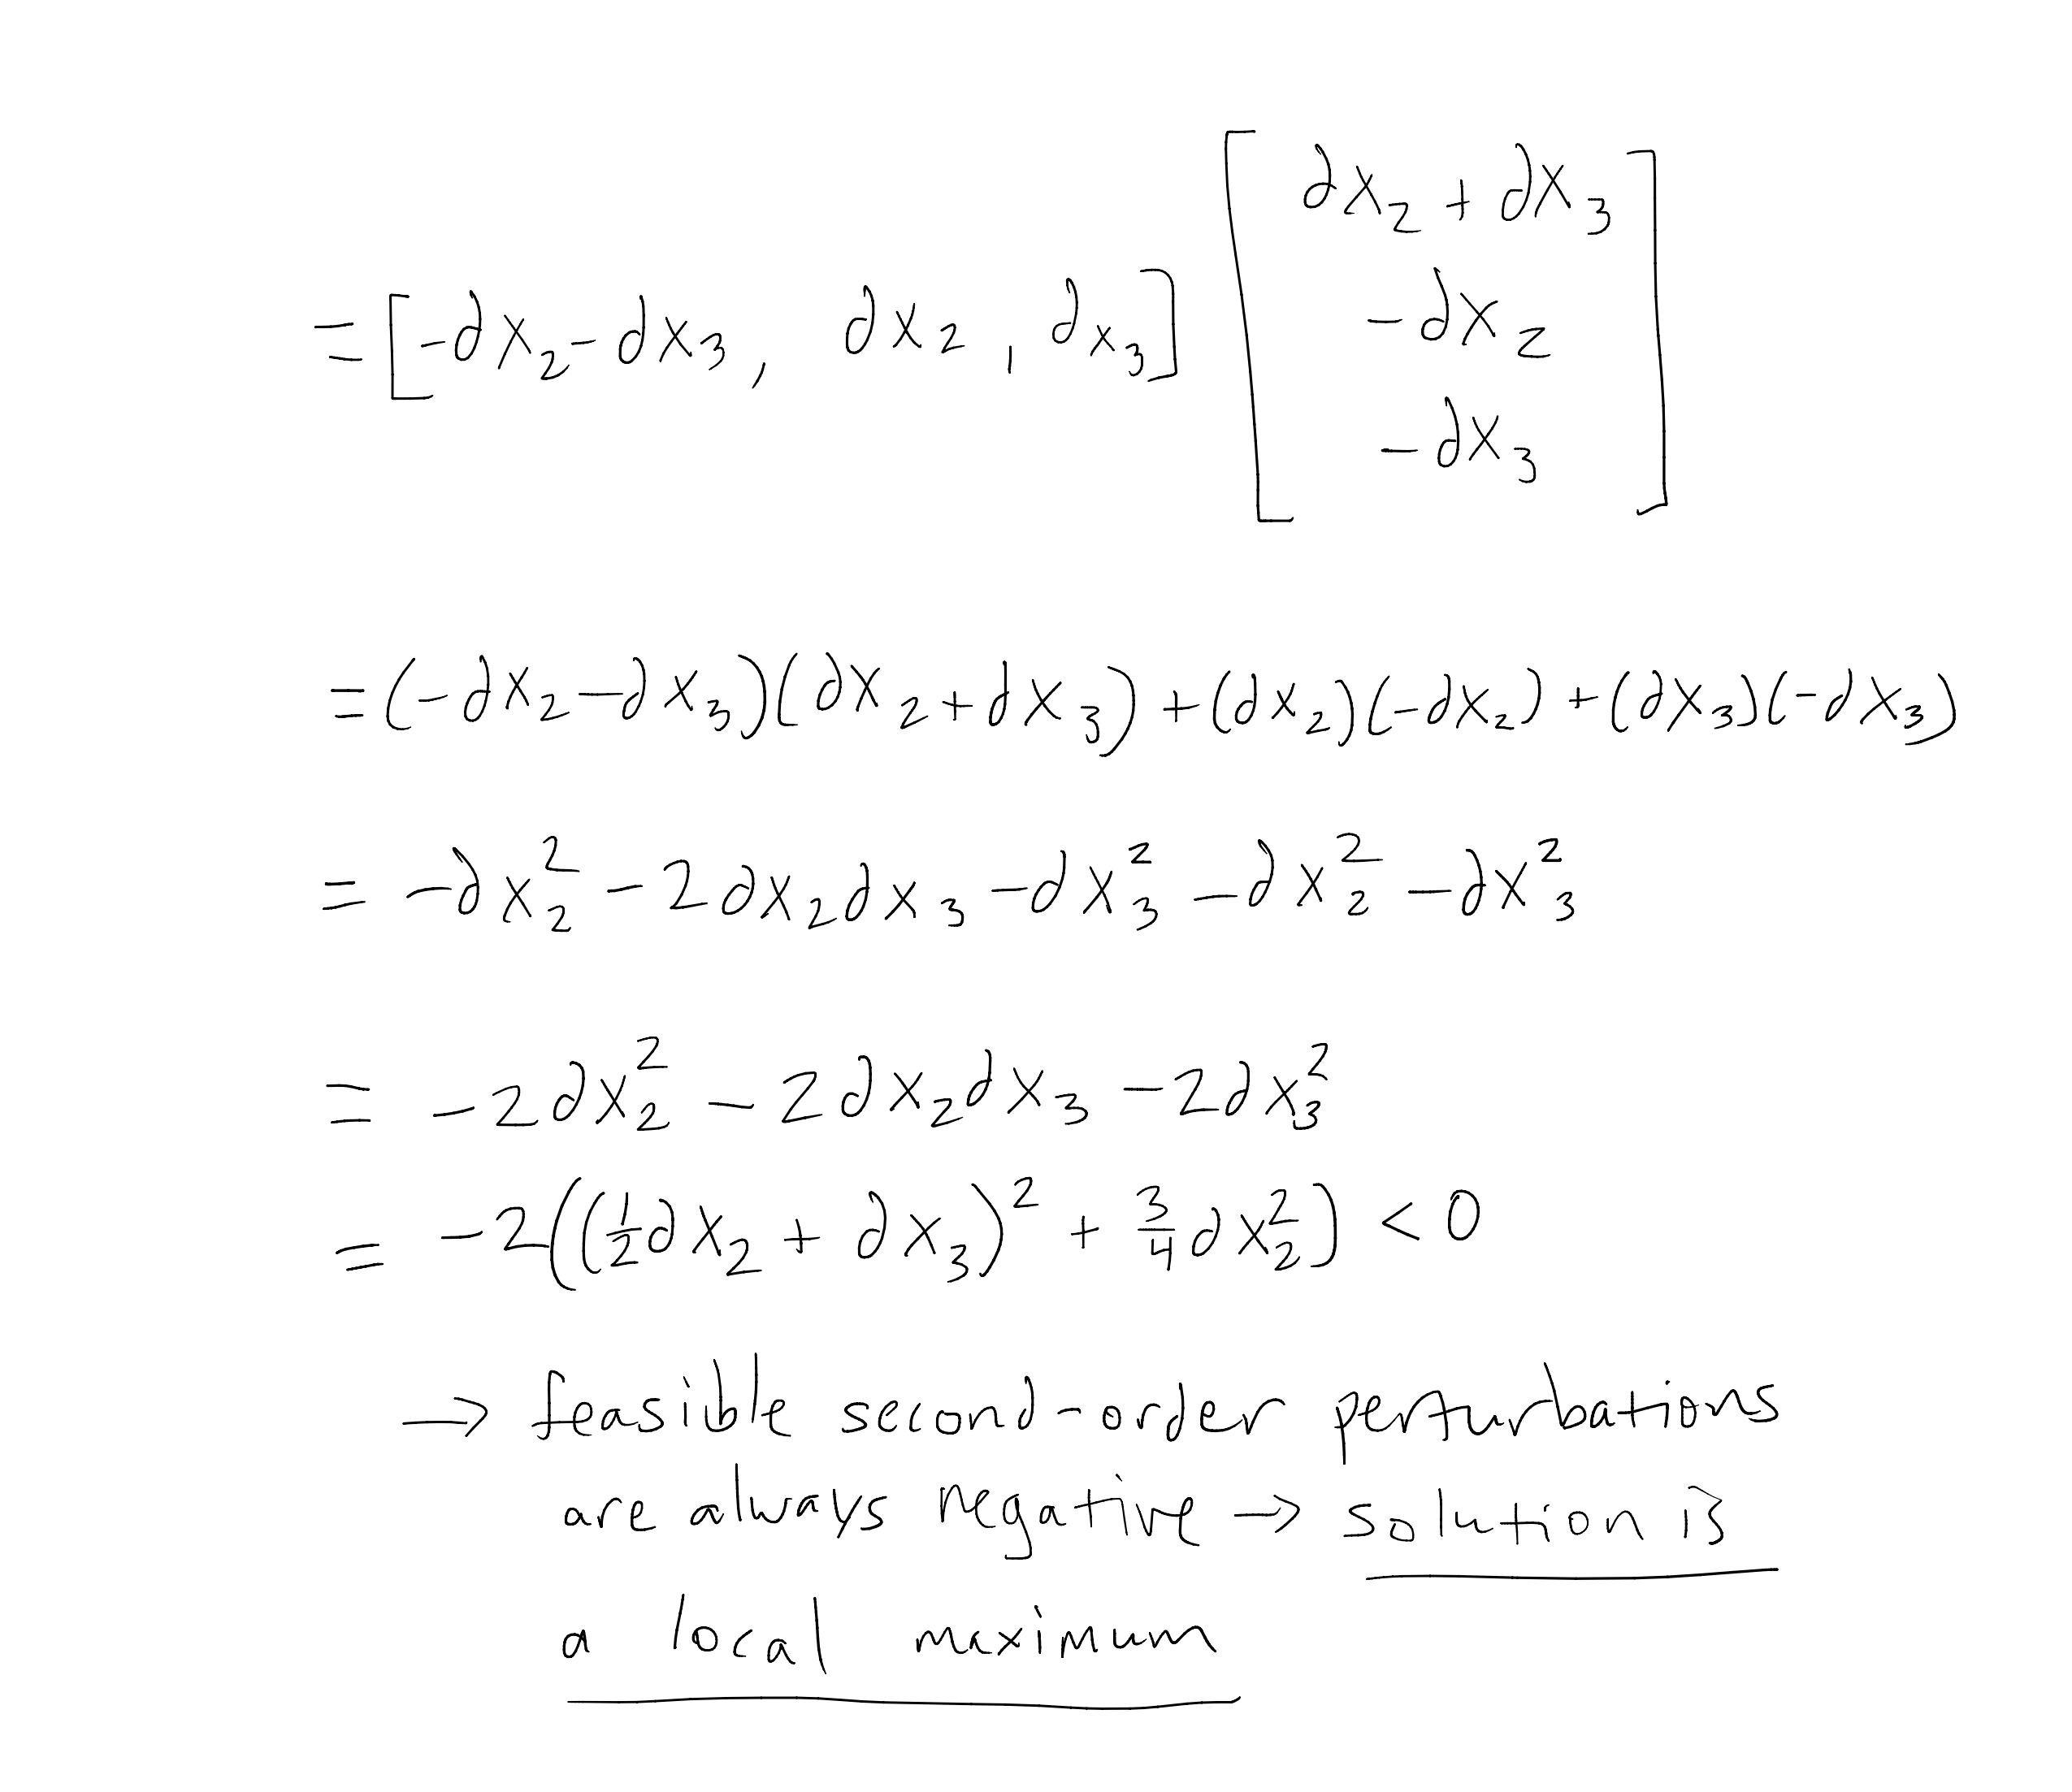

**Problem 4**

In [3]:
import math

def f(x1, x2, x3):
  return x1 ** 2 + x2 ** 2 + x3 ** 2

def h1(x1, x2, x3):
  return x1 ** 2 / 4 + x2 ** 2 / 5 + x3 ** 2 / 25

def h2(x1, x2, x3):
  return x1 + x2 - x3

def redGrad(x1, x2, x3):
  return 2 * x1 - (-x1 * x2 - 0.16 * x2 * x3 - x1 * x3 + 0.8 * x2 * x3) / (-0.4 * x2 - 0.08 * x3)

def phi(x1, x2, x3, a, t, dfdd):
  return f(x1, x2, x3) - a * t * dfdd ** 2

def lineSearch(x1, x2, x3, dfdd):
  a = 1
  t = 0.3
  fk = f(x1 - a * dfdd, x2 + a * dfdd * (-x2 / 2 - 0.08 * x3) / (-0.4 * x2 - 0.08 * x3), x3 + a * dfdd * (-x1 / 2 + 0.4 * x2) / (-0.4 * x2 - 0.08 * x3))
  phik = phi(x1, x2, x3, a, t, dfdd)
  i = 0
  while fk > phik and i < 100:
    a = a / 2
    fk = f(x1 - a * dfdd, x2 + a * dfdd * (-x2 / 2 - 0.08 * x3) / (-0.4 * x2 - 0.08 * x3), x3 + a * dfdd * (-x1 / 2 + 0.4 * x2) / (-0.4 * x2 - 0.08 * x3))
    phik = phi(x1, x2, x3, a, t, dfdd)
    i = i + 1
  return a

def NR(x1, x2, x3):
  h1k = h1(x1, x2, x3)
  h2k = h2(x1, x2, x3)
  j = 0
  while h1k ** 2 + h2k ** 2 > e ** 2 and j < 100:
    x2 = x2 - 1/(-0.4 * x2 - 0.08 * x3) * (-h1k - 0.08 * x3 * h2k)
    x3 = x3 - 1/(-0.4 * x2 - 0.08 * x3) * (-h1k + 0.4 * x2 * h2k)
    h1k = h1(x1, x2, x3)
    h2k = h2(x1, x2, x3)
    j = j + 1
  return [x2, x3]

def genRedGrad(x1, x2, x3, k):
  dfdd = redGrad(x1, x2, x3)
  while dfdd ** 2 > e and k < 100:
    a = lineSearch(x1, x2, x3, dfdd)
    x1 = x1 - a * dfdd
    x2 = x2 + a * dfdd * (-x2 / 2 - 0.08 * x3) / (-0.4 * x2 - 0.08 * x3)
    x3 = x3 + a * dfdd * (-x1 / 2 + 0.4 * x2) / (-0.4 * x2 - 0.08 * x3)
    s = NR(x1, x2, x3)
    x2 = s[0]
    x3 = s[1]
    dfdd = redGrad(x1, x2, x3)
    k = k + 1
    fk = f(x1, x2, x3)
    print('---')
    print('k =', k)
    print('x =', x1, x2, x3)
    print('f =', fk)
    print('df/dd =', dfdd)
    data_f.append(fk)
    data_g.append(dfdd)
  return [x1, x2, x3, dfdd]

# d = [x1], s = [x2, x3]
# x3 = x1 + x2
# x2 = x1/6 +/- sqrt(-0.272x1^2 + 0.96)/0.48
# |x1| <= sqrt(0.96/0.272)

x10 = 1.5
x20 = x10 / 6 + math.sqrt(-0.272 * x10 ** 2 + 0.96) / 0.48
x30 = x10 + x20

k = 0
e = 1e-3
data_f = []
data_g = []

x = genRedGrad(x10, x20, x30, k)
x1 = x[0]
x2 = x[1]
x3 = x[2]
dfdd = x[3]

print('solution:')
print('x =', x1, x2, x3)
print('f =', f(x1, x2, x3))
print('df/dd =', dfdd)

---
k = 1
x = 1.9149371169198468 -2.3656833198927765 1.6919790307573592
f = 12.126234772298817
df/dd = 5.398001654736708
---
k = 2
x = 0.5654367032356697 -0.5654452330937572 1.4557783407811782
f = 2.7587375544820762
df/dd = 10.5210527986218
---
k = 3
x = 0.23665380327873847 -0.053263855601515336 -0.07074403241326455
f = 0.06384677904191996
df/dd = -0.7044578646002987
---
k = 4
x = 0.23665380327873864 -0.06926106719047123 0.6184323828608386
f = 0.4432607302055897
df/dd = -6.755704809656148
---
k = 5
x = 0.34221169092961595 -1.841548736141968 0.4431465619333266
f = 3.7047894643483144
df/dd = 0.7468036901697691
---
k = 6
x = -0.40459199924015316 -0.1567908189947717 0.8865864649395214
f = 0.9743136065841526
df/dd = 24.31738718127238
---
k = 7
x = -0.4520868960785758 0.31668629392132447 -0.2646759089754427
f = 0.3747261071555613
df/dd = -1.1897753882359696
---
k = 8
x = -0.30336497254907957 -0.5546184022026358 -0.21986585089608363
f = 0.4479728710217674
df/dd = 0.048594767902606084
---
k = 

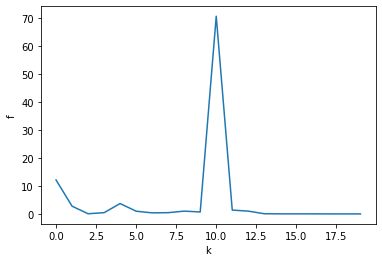

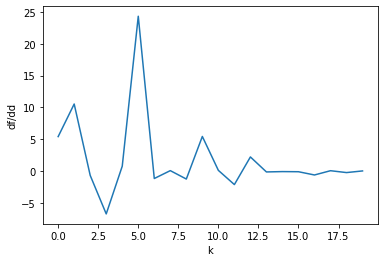

In [4]:
import matplotlib.pyplot as plt

plt.plot(data_f)
plt.xlabel('k')
plt.ylabel('f')
plt.show()
plt.plot(data_g)
plt.xlabel('k')
plt.ylabel('df/dd')
plt.show()

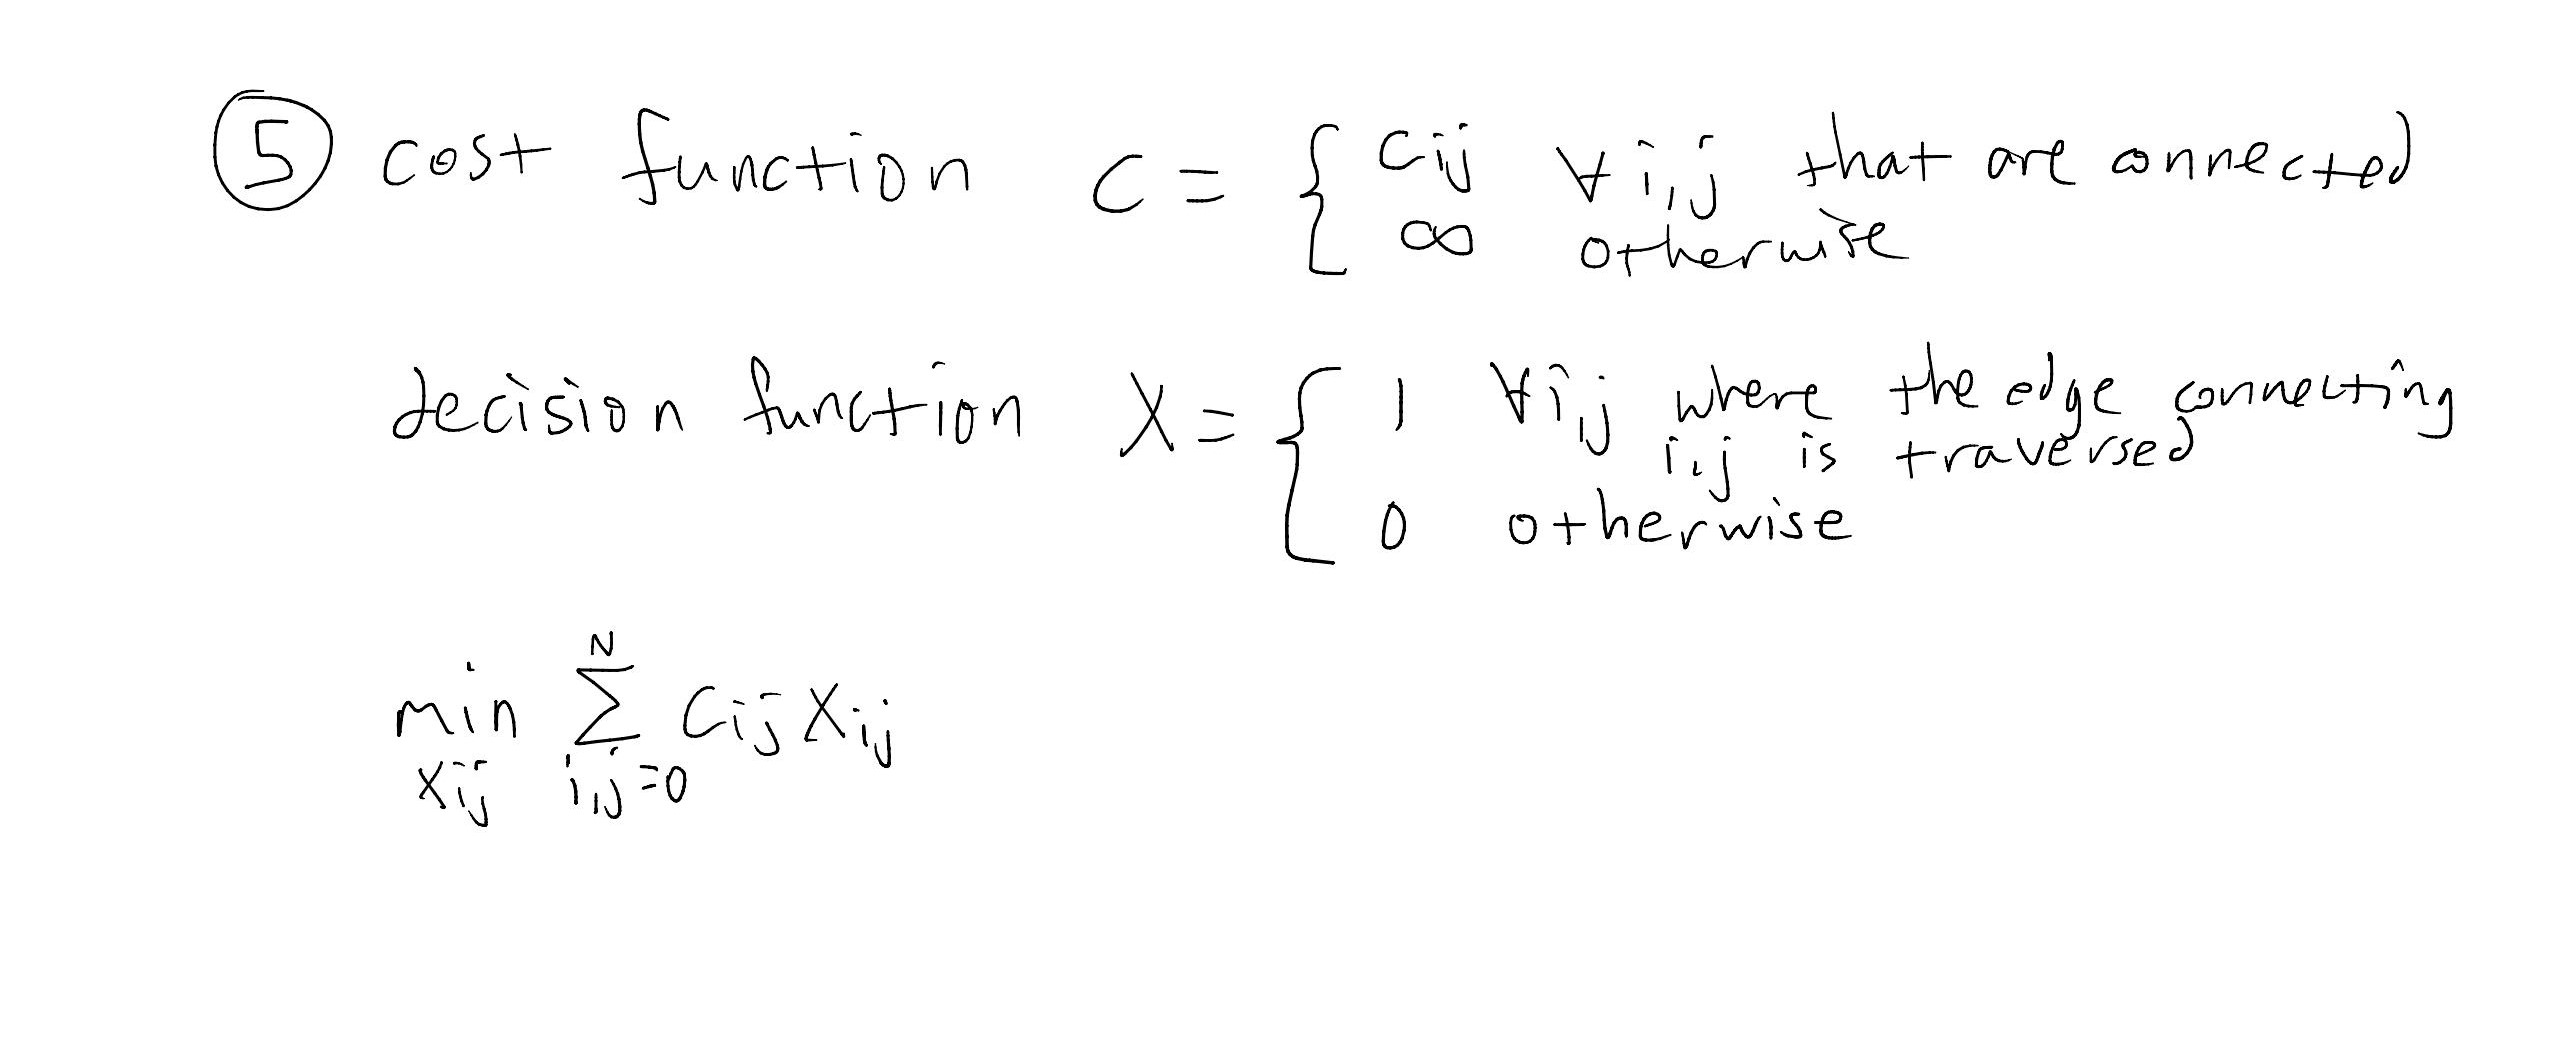

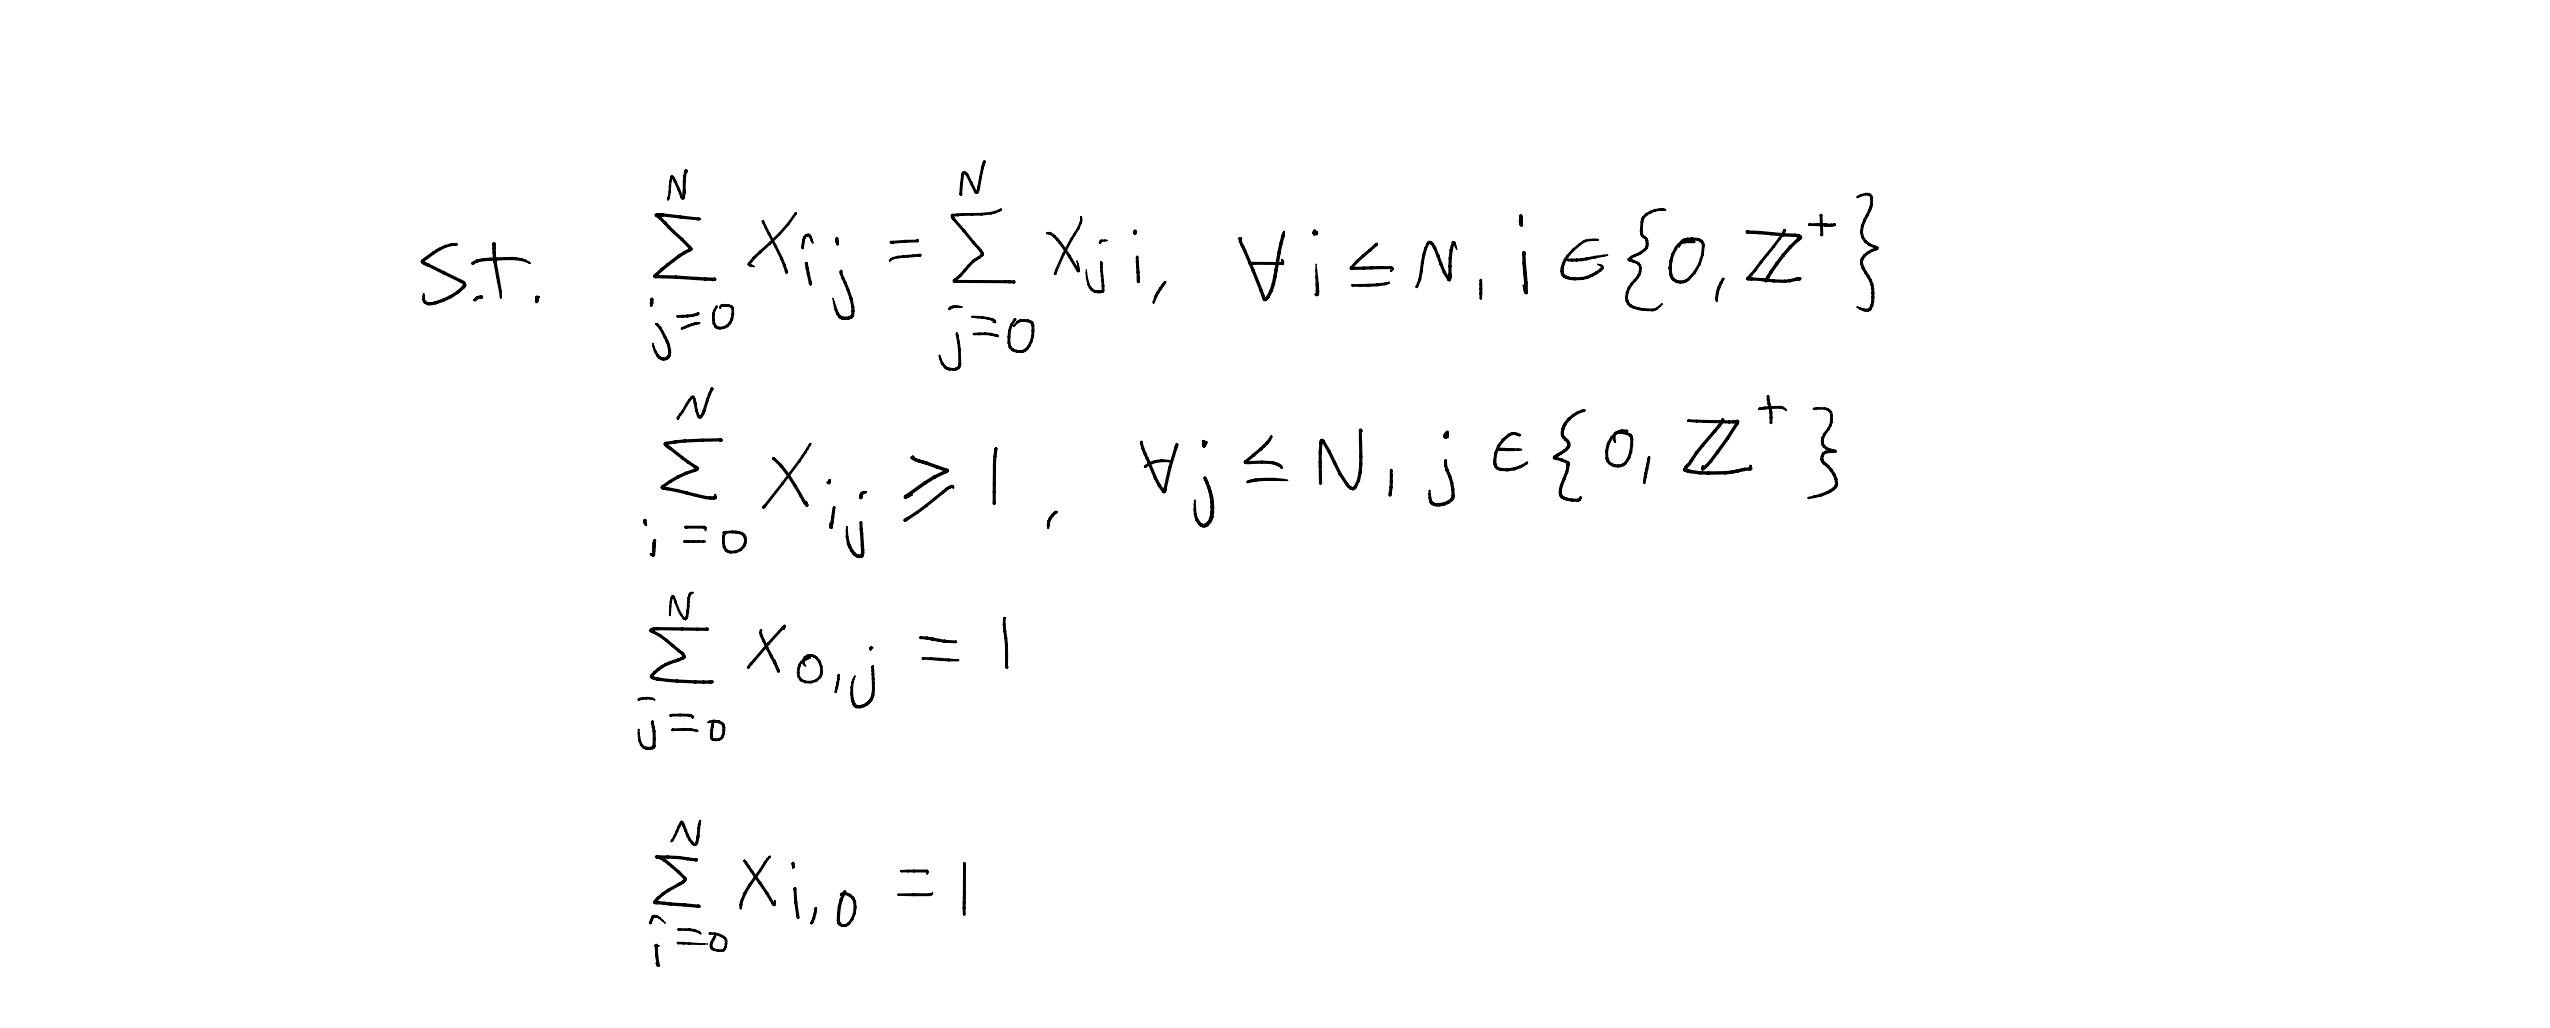